In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ls ../

README.md                  out_test_MGYG000000196/
Snakefile                  phasefinder_akk_H4024.csv
check_ratio.py             scripts/
combined_with_SRR_all.csv  slurm.sh
jupyter_notebook/          test.sh
metadata/


In [21]:
phase_df = pd.read_csv("../phasefinder_akk_H4024.csv")

In [22]:
phase_df

,species_id,sample_id,ID,Pe_F,Pe_R,Pe_ratio,Span_F,Span_R,Span_ratio
0,MGYG000000870,SRR5935745,MGYG000000870_10:10008-10020-10301-10313,4,0,0.0,2,0,0.0
1,MGYG000000870,SRR5935745,MGYG000000870_10:100553-100565-100986-100998,4,0,0.0,2,0,0.0
2,MGYG000000870,SRR5935745,MGYG000000870_10:103909-103922-104203-104216,2,0,0.0,1,0,0.0
3,MGYG000000870,SRR5935745,MGYG000000870_10:105072-105085-105584-105597,2,0,0.0,1,0,0.0
4,MGYG000000870,SRR5935745,MGYG000000870_10:11971-11982-12352-12363,16,0,0.0,9,0,0.0
...,...,...,...,...,...,...,...,...,...
243359,MGYG000004532,SRR5962882,MGYG000004532_9:74829-74843-74993-75007,0,0,NaN,0,0,NaN
243360,MGYG000004532,SRR5962882,MGYG000004532_9:75396-75407-75635-75646,0,0,NaN,0,0,NaN
243361,MGYG000004532,SRR5962882,MGYG000004532_9:76454-76465-76855-76866,0,0,NaN,0,0,NaN
243362,MGYG000004532,SRR5962882,MGYG000004532_9:77457-77471-78064-78078,0,0,NaN,0,0,NaN


In [23]:
antibiotic_samples = ['SRR5936212', 'SRR5936126']  
phase_df['Antibiotic'] = phase_df['sample_id'].isin(antibiotic_samples)


In [25]:
phase_df = phase_df.dropna(subset=['Pe_ratio'])


In [28]:
species_to_plot = 'MGYG000002452'
df_plot = phase_df[phase_df['species_id']==species_to_plot]

,species_id,sample_id,ID,Pe_F,Pe_R,Pe_ratio,Span_F,Span_R,Span_ratio,Antibiotic
87538,MGYG000002452,SRR5935745,MGYG000002452_1:123302-123315-123589-123602,2,0,0.0,1,0,0.0,False
87539,MGYG000002452,SRR5935745,MGYG000002452_1:1382860-1382871-1382967-1382978,2,0,0.0,0,0,NaN,False
87540,MGYG000002452,SRR5935745,MGYG000002452_1:1383050-1383061-1383157-1383168,2,0,0.0,0,0,NaN,False
87541,MGYG000002452,SRR5935745,MGYG000002452_1:547579-547591-547700-547712,2,0,0.0,0,0,NaN,False
87542,MGYG000002452,SRR5935745,MGYG000002452_1:725312-725323-725926-725937,2,0,0.0,2,0,0.0,False
...,...,...,...,...,...,...,...,...,...,...
116610,MGYG000002452,SRR5962882,MGYG000002452_2:390836-390847-391194-391205,18,0,0.0,4,0,0.0,False
116611,MGYG000002452,SRR5962882,MGYG000002452_2:54238-54249-54533-54544,2,0,0.0,0,0,NaN,False
116612,MGYG000002452,SRR5962882,MGYG000002452_2:645903-645917-646120-646134,2,0,0.0,1,0,0.0,False
116613,MGYG000002452,SRR5962882,MGYG000002452_2:710993-711006-711234-711247,2,0,0.0,1,0,0.0,False


In [36]:
phase_df.sort_values('Pe_ratio',ascending=False)

,species_id,sample_id,ID,Pe_F,Pe_R,Pe_ratio,Span_F,Span_R,Span_ratio,Antibiotic
20841,MGYG000000870,SRR5950592,MGYG000000870_28:16806-16821-17012-17027,0,4,1.0,0,2,1.0,False
53393,MGYG000001881,SRR5950740,MGYG000001881_29:33310-33325-33464-33479,0,2,1.0,0,1,1.0,False
82557,MGYG000002378,SRR5950718,MGYG000002378_50:16420-16435-16732-16747,0,2,1.0,0,0,NaN,False
36293,MGYG000001881,SRR5946609,MGYG000001881_3:60545-60559-60880-60894,0,6,1.0,0,0,NaN,False
158592,MGYG000002454,SRR5946612,MGYG000002454_1:342706-342718-342962-342974,0,4,1.0,0,1,1.0,False
...,...,...,...,...,...,...,...,...,...,...
57495,MGYG000002378,SRR5935772,MGYG000002378_37:32771-32783-33196-33208,2,0,0.0,1,0,0.0,False
57494,MGYG000002378,SRR5935772,MGYG000002378_37:32413-32426-32632-32645,2,0,0.0,1,0,0.0,False
57493,MGYG000002378,SRR5935772,MGYG000002378_37:31645-31658-32178-32191,2,0,0.0,2,0,0.0,False
57492,MGYG000002378,SRR5935772,MGYG000002378_37:30736-30749-30899-30912,4,0,0.0,1,0,0.0,False


In [37]:
phase_df.sort_values('Antibiotic',ascending=False)

,species_id,sample_id,ID,Pe_F,Pe_R,Pe_ratio,Span_F,Span_R,Span_ratio,Antibiotic
155357,MGYG000002454,SRR5936212,MGYG000002454_1:1340338-1340351-1340776-1340789,34,0,0.0,18,0,0.0,True
155592,MGYG000002454,SRR5936212,MGYG000002454_1:1909701-1909712-1909782-1909793,30,0,0.0,21,0,0.0,True
155572,MGYG000002454,SRR5936212,MGYG000002454_1:1865231-1865244-1865281-1865294,4,0,0.0,2,0,0.0,True
155571,MGYG000002454,SRR5936212,MGYG000002454_1:1861933-1861946-1862367-1862380,32,0,0.0,14,0,0.0,True
155570,MGYG000002454,SRR5936212,MGYG000002454_1:183731-183744-184178-184191,18,0,0.0,10,0,0.0,True
...,...,...,...,...,...,...,...,...,...,...
62949,MGYG000002378,SRR5946609,MGYG000002378_41:72045-72058-72421-72434,2,0,0.0,1,0,0.0,False
62948,MGYG000002378,SRR5946609,MGYG000002378_38:52317-52330-52802-52815,2,0,0.0,0,0,NaN,False
62947,MGYG000002378,SRR5946609,MGYG000002378_36:113452-113464-113996-114008,44,0,0.0,26,0,0.0,False
62946,MGYG000002378,SRR5946609,MGYG000002378_36:112182-112195-112674-112687,18,0,0.0,6,0,0.0,False


In [47]:
phase_df['sample_id'].unique()

array(['SRR5935745', 'SRR5935772', 'SRR5936126', 'SRR5936159',
       'SRR5936212', 'SRR5946609', 'SRR5946612', 'SRR5946644',
       'SRR5946748', 'SRR5946947', 'SRR5947041', 'SRR5947045',
       'SRR5950500', 'SRR5950528', 'SRR5950592', 'SRR5950649',
       'SRR5950717', 'SRR5950718', 'SRR5950740', 'SRR5962882'],
      dtype=object)

In [48]:
sample_order = [
    "SRR5962882",
    "SRR5936159",
    "SRR5947045",
    "SRR5946748",
    "SRR5936212", #antibio
    "SRR5936126", #antibio
    "SRR5947041",
    "SRR5946612",
    "SRR5946609",
    "SRR5946947",
    "SRR5946644",
    "SRR5950740",
    "SRR5950718",
    "SRR5935745",
    "SRR5950500",
    "SRR5950592",
    "SRR5950528",
    "SRR5950717",
    "SRR5935772",
    "SRR5950649"
]

/var/folders/0g/jffzlx7x0v37frp3q4ssdnp80000gn/T/ipykernel_64411/3660949442.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['Present'] = (~df_plot['Pe_ratio'].isna()).astype(int)


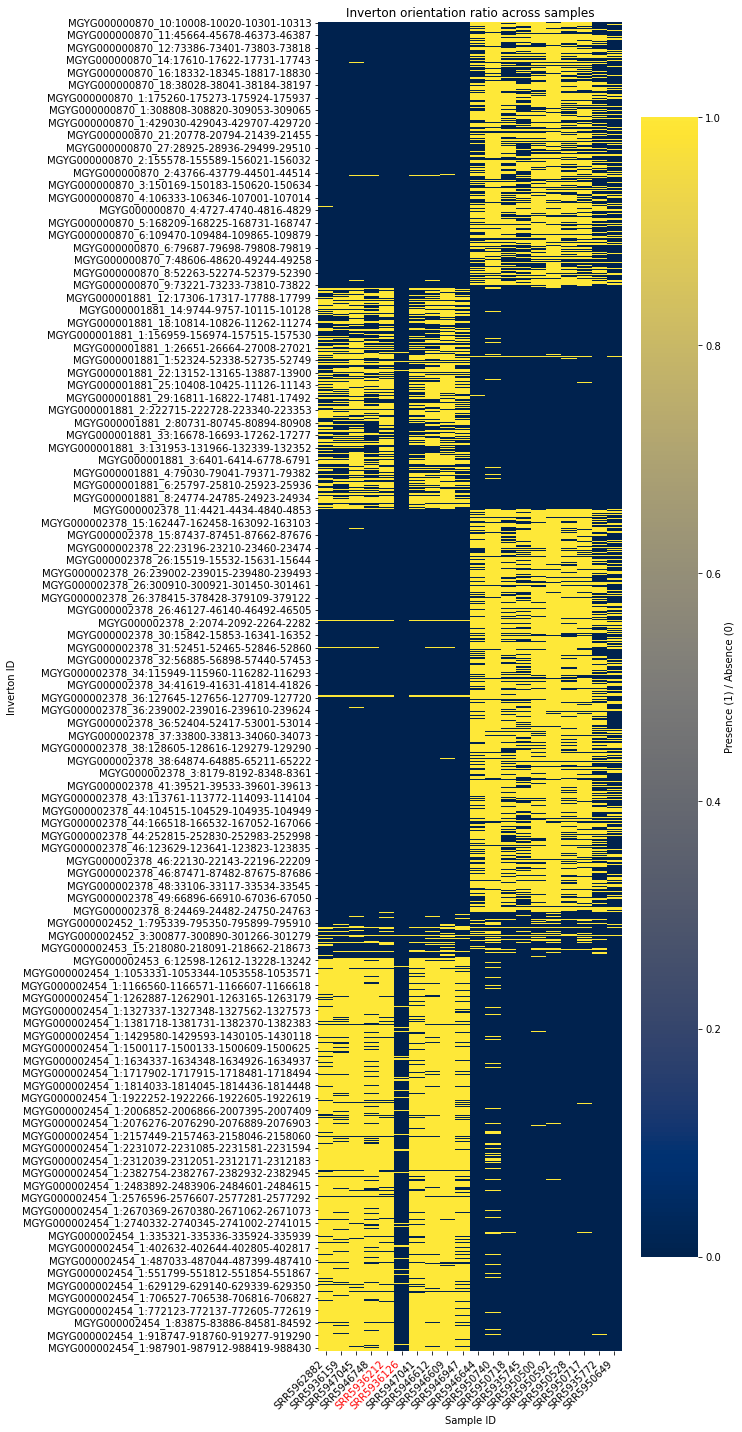

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a simple presence/absence indicator
df_plot['Present'] = (~df_plot['Pe_ratio'].isna()).astype(int)

# Pivot to a matrix: rows = inverton ID, columns = sample_id
heatmap_data = df_plot.pivot_table(index='ID', columns='sample_id', values='Present', fill_value=0)[sample_order]

plt.figure(figsize=(10, 20))
sns.heatmap(heatmap_data, cmap='cividis', cbar_kws={'label': 'Presence (1) / Absence (0)'})

# Highlight two antibiotic samples
antibiotic_samples = ["SRR5936212", "SRR5936126"]  # replace with your actual antibiotic sample IDs

ax = plt.gca()
ax.set_xlabel('Sample ID')
ax.set_ylabel('Inverton ID')
plt.title('Inverton orientation ratio across samples')


for label in ax.get_xticklabels():
    if label.get_text() in antibiotic_samples:
        label.set_color('red')   # antibiotic samples in red
    else:
        label.set_color('black') # others in black

plt.xticks(rotation=45, ha = 'right')
plt.tight_layout()
plt.show()
